#### Importing Modules

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime



##### Reading csv with timeline index

In [6]:
data = pd.read_csv('data/ETH-USD.csv',index_col='Date',parse_dates=True)

In [7]:
data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


##### Calculating The ETH price change ratio vs open price

In [8]:
open_price = data[['Open','High','Low']].copy()
open_price['High/Open'] = (open_price['High']-open_price['Open'])*100/open_price['Open']
open_price['Low/Open'] = (-open_price['Open']+open_price['Low'])*100/open_price['Open']


Text(0, 0.5, 'Percentage')

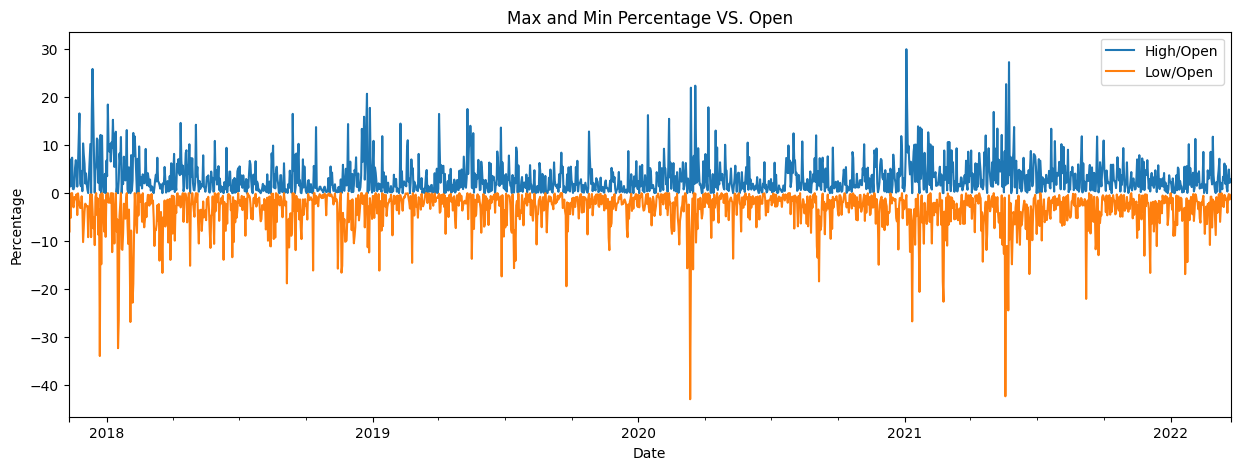

In [9]:
ax = open_price[['High/Open','Low/Open']].plot(figsize=(15,5),title='Max and Min Percentage VS. Open')
ax.set_xlabel(xlabel='Date')
ax.set_ylabel(ylabel='Percentage')



##### Initializing requirements


In [10]:
price_changes_percentage = np.arange(start=0,stop=20.1,step=0.1) #
samples_nu = data.shape[0]
shp = price_changes_percentage.shape[0]

#### h_o : the ratio of highest price vs open price minus 1
#### l_o : the ratio of lowest price vs open price minus 1


In [11]:
h_o = np.zeros(shp)
l_o = np.zeros(shp)

for changes_percentage in range(len(price_changes_percentage)):
    h_o[changes_percentage] = np.sum(open_price['High/Open']>=price_changes_percentage[changes_percentage])/samples_nu # between 0 and 1 : type = chance
    l_o[changes_percentage] = np.sum(open_price['Low/Open']<=(price_changes_percentage[changes_percentage])*-1)/samples_nu # between 0 and 1 : type = chance
    
h_l_o = pd.DataFrame(data=[l_o,h_o]).transpose()
h_l_o.columns = ['Low to Open','High to Open']
h_l_o.set_index(price_changes_percentage,inplace=True)

#### Plotting The high and low ratio vs open

(0.0, 1.0)

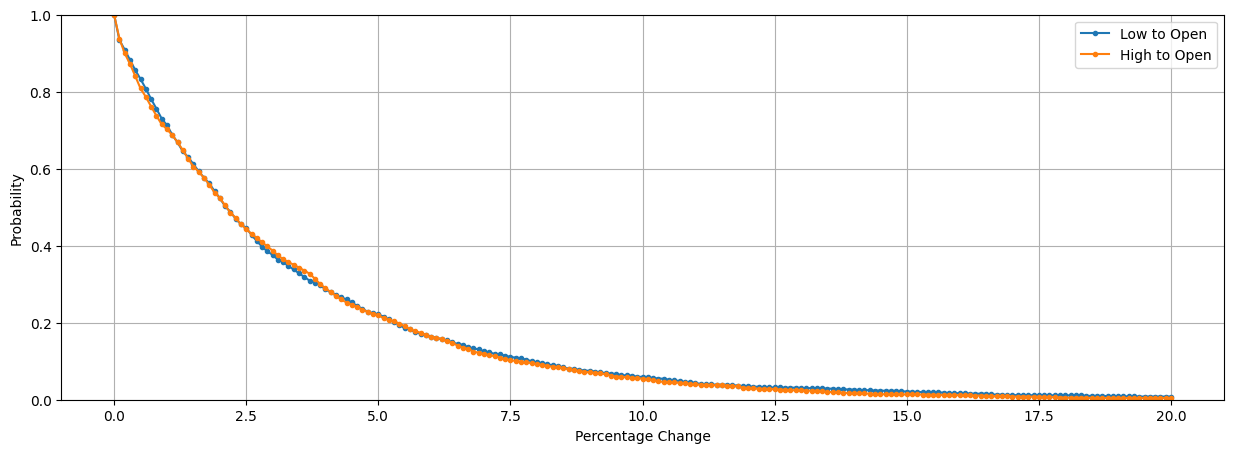

In [12]:
ax = h_l_o.plot(figsize=(15,5),grid=True,style=['.-','.-'])
ax.set_xlabel('Percentage Change')
ax.set_ylabel('Probability')
ax.set_ylim(bottom=0,top=1)

### As we can see, the chance of percentage changes in both direction are the same. It means that highest and lowest price vs open ratio has a mean of zero and nearly std of zero.

#### Finding The chance of either or neither highest and lowest percentage vs open happens

In [13]:
both = np.zeros(shp)
none_ = np.zeros(shp)
for changes_percentage in range(len(price_changes_percentage)):
    both[changes_percentage] = open_price[(open_price['High/Open']>=changes_percentage)&(open_price['Low/Open']<=changes_percentage*-1)].shape[0]/samples_nu
    none_[changes_percentage] = open_price[(open_price['High/Open']<=changes_percentage)&(open_price['Low/Open']>=changes_percentage*-1)].shape[0]/samples_nu

In [14]:
both_or_none = pd.DataFrame(data=[both,none_]).transpose()
both_or_none.columns = ['Both at Same Time','None Happens']
both_or_none.set_index(price_changes_percentage,inplace=True)

#### Plotting both and none highest and lowest 

(0.0, 1.0)

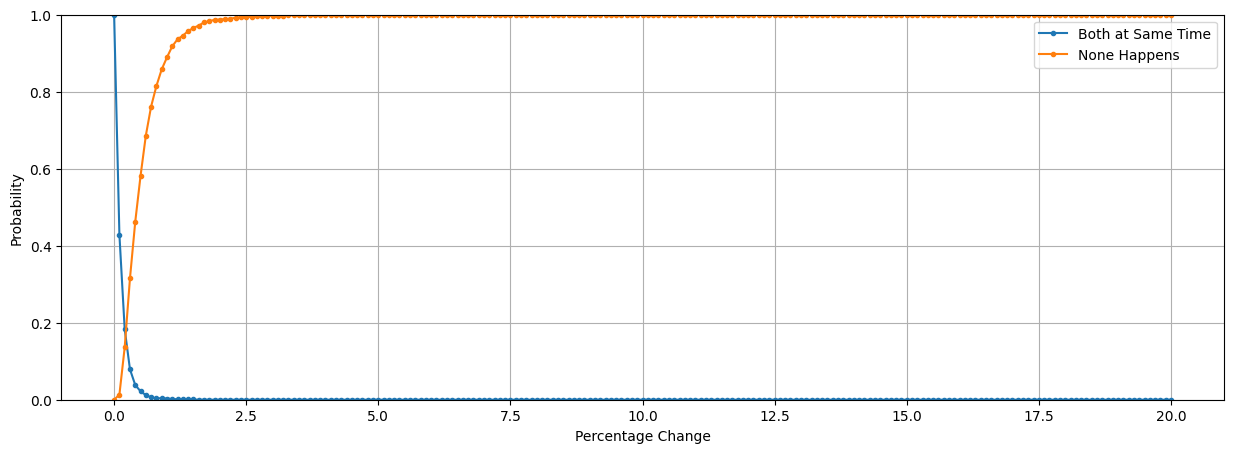

In [15]:
ax = both_or_none.plot(figsize=(15,5),grid=True,style=['.-','.-'])
ax.set_xlabel('Percentage Change')
ax.set_ylabel('Probability')
ax.set_ylim(bottom=0,top=1)

#### As the plot says the chance of both highest and lowest happen at same dat drops dramatically 5 steps(each step is 0.1%)

.

.

.

.


#### Next we will find if we open a long or short position, what is the chance of closing the position vs different percentage of benefit

In [16]:
shift_day = []
for shift in range(4):
    low_to_open = (-open_price['Open'].shift(shift)+open_price['Low'])*100/open_price['Open'].shift(shift)
    high_to_open = (open_price['High']-data['Open'].shift(shift))*100/open_price['Open'].shift(shift)
    shift_day.append([ low_to_open,high_to_open ])

In [17]:
LOW_TO_OPEN = 0
HIGH_TO_OPEN = 1
percentage_df = pd.DataFrame(data=[shift_day[0][LOW_TO_OPEN],shift_day[0][HIGH_TO_OPEN],
                                   shift_day[1][LOW_TO_OPEN],shift_day[1][HIGH_TO_OPEN],
                                   shift_day[2][LOW_TO_OPEN],shift_day[2][HIGH_TO_OPEN],
                                   shift_day[3][LOW_TO_OPEN],shift_day[3][HIGH_TO_OPEN]]).transpose()

In [18]:
days_ratio = ['Lowest Price of Day 0 VS. Open of Day 0', 'Highest Price of Day 0 VS. Open of Day 0',
              'Lowest Price of Day 1 VS. Open of Day 0', 'Highest Price of Day 1 VS. Open of Day 0',
              'Lowest Price of Day 2 VS. Open of Day 0', 'Highest Price of Day 2 VS. Open of Day 0',
              'Lowest Price of Day 3 VS. Open of Day 0', 'Highest Price of Day 3 VS. Open of Day 0']
percentage_df.columns = days_ratio

In [19]:
percentage_df.head()

,Lowest Price of Day 0 VS. Open of Day 0,Highest Price of Day 0 VS. Open of Day 0,Lowest Price of Day 1 VS. Open of Day 0,Highest Price of Day 1 VS. Open of Day 0,Lowest Price of Day 2 VS. Open of Day 0,Highest Price of Day 2 VS. Open of Day 0,Lowest Price of Day 3 VS. Open of Day 0,Highest Price of Day 3 VS. Open of Day 0
Date,,,,,,,,
2017-11-09,-0.514827,6.741404,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-10,-8.148226,1.262040,-4.569326,5.207601,NaN,NaN,NaN,NaN
2017-11-11,-0.131960,6.988608,-7.009990,-0.379825,-3.386740,3.501762,NaN,NaN
2017-11-12,-5.140615,1.418225,-0.024448,6.888138,-6.909883,-0.473375,-3.282732,3.404567
2017-11-13,0.000000,6.966864,-2.435733,4.361437,2.826320,9.990090,-4.255451,2.414942


In [20]:
profit_0 = np.zeros(shp)
lose_0 = np.zeros(shp)
profit_1 = np.zeros(shp)
lose_1 = np.zeros(shp)
profit_2 = np.zeros(shp)
lose_2 = np.zeros(shp)
profit_3 = np.zeros(shp)
lose_3 = np.zeros(shp)

for changes_percentage in range(len(price_changes_percentage)):
    profit_0[changes_percentage] = np.sum(percentage_df[days_ratio[1]]>=price_changes_percentage[changes_percentage])/samples_nu
    lose_0[changes_percentage] = np.sum(percentage_df[days_ratio[0]]<=(price_changes_percentage[changes_percentage])*-1)/samples_nu
    ###
    profit_1[changes_percentage] = np.sum((percentage_df[days_ratio[1]]>=price_changes_percentage[changes_percentage]) |
                                  (percentage_df[days_ratio[3]]>=price_changes_percentage[changes_percentage]) )/samples_nu
    
    lose_1[changes_percentage] = np.sum((percentage_df[days_ratio[0]]<=(price_changes_percentage[changes_percentage]*-1)) |
                                (percentage_df[days_ratio[2]]<=(price_changes_percentage[changes_percentage]*-1)) )/samples_nu 
    # ###
    profit_2[changes_percentage] = np.sum((percentage_df[days_ratio[1]]>=price_changes_percentage[changes_percentage]) |
                                  (percentage_df[days_ratio[3]]>=price_changes_percentage[changes_percentage]) |
                                  (percentage_df[days_ratio[5]]>=price_changes_percentage[changes_percentage]))/samples_nu
    
    
    lose_2[changes_percentage] = np.sum((percentage_df[days_ratio[0]]<=(price_changes_percentage[changes_percentage]*-1)) |
                                (percentage_df[days_ratio[2]]<=(price_changes_percentage[changes_percentage]*-1)) |
                                (percentage_df[days_ratio[4]]<=(price_changes_percentage[changes_percentage]*-1)))/samples_nu
    # ###
    profit_3[changes_percentage] = np.sum((percentage_df[days_ratio[1]]>=price_changes_percentage[changes_percentage]) |
                                  (percentage_df[days_ratio[3]]>=price_changes_percentage[changes_percentage]) |
                                  (percentage_df[days_ratio[5]]>=price_changes_percentage[changes_percentage]) |
                                  (percentage_df[days_ratio[7]]>=price_changes_percentage[changes_percentage]))/samples_nu
    
    
    
    lose_3[changes_percentage] = np.sum((percentage_df[days_ratio[0]]<=(price_changes_percentage[changes_percentage]*-1)) |
                                (percentage_df[days_ratio[2]]<=(price_changes_percentage[changes_percentage]*-1)) |
                                (percentage_df[days_ratio[4]]<=(price_changes_percentage[changes_percentage]*-1)) |
                                (percentage_df[days_ratio[6]]<=(price_changes_percentage[changes_percentage]*-1)))/samples_nu

 
percentage_chance = pd.DataFrame(data=[lose_0*100,profit_0*100,lose_1*100,profit_1*100,lose_2*100,profit_2*100,lose_3*100,profit_3*100]).transpose()
percentage_chance.index = price_changes_percentage
percentage_chance.columns = percentage_df.columns

Text(0, 0.5, 'Chance')

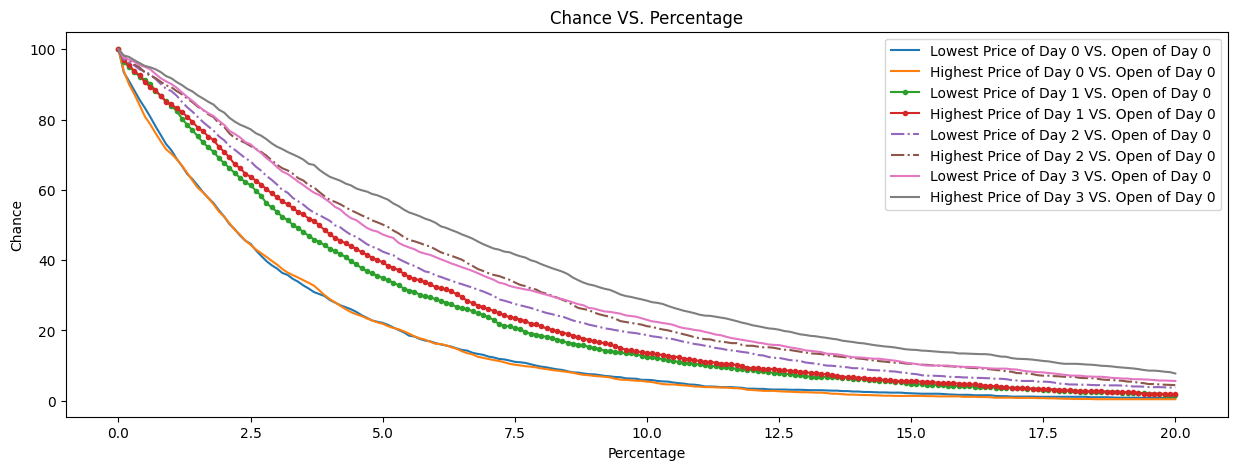

In [21]:

ax = percentage_chance.plot(figsize=(15,5),title='Chance VS. Percentage'
                            ,style=['-','-','.-','.-','-.','-.'])

# ax.set_xlim(left=0,right=20)
# ax.set_ylim(bottom=0,top=100)
ax.set_xlabel(xlabel='Percentage')
ax.set_ylabel(ylabel='Chance')


#### This is it, a very beautiful chart :)
.
 

.


.


.
#### Now I will zoom a bit, between 0 and 1.5 percentage

Text(0, 0.5, 'Chance')

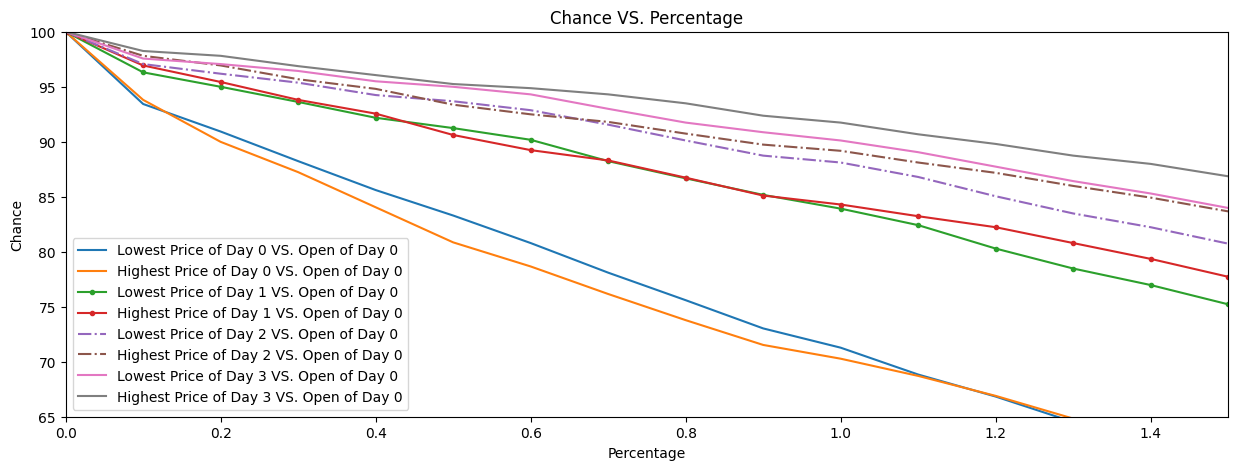

In [22]:

ax = percentage_chance.plot(figsize=(15,5),title='Chance VS. Percentage'
                            ,style=['-','-','.-','.-','-.','-.'])

ax.set_xlim(left=0,right=1.5)
ax.set_ylim(bottom=65,top=100)
ax.set_xlabel(xlabel='Percentage')
ax.set_ylabel(ylabel='Chance')

#### this chart shows that if a sell position is opened without any knowledge the chance of closing after 3 increase significantly
.
 
.

.

.

.
#### Next we will find the best long position :)))

In [23]:
best_profit_0 = np.zeros(shp)
best_profit_1 = np.zeros(shp)
best_profit_2 = np.zeros(shp)
best_profit_3 = np.zeros(shp)

worst_lose_0 = np.zeros(shp)
worst_lose_1 = np.zeros(shp)
worst_lose_2 = np.zeros(shp)
worst_lose_3 = np.zeros(shp)

for changes_percentage in range(len(price_changes_percentage)):
    best_profit_0[changes_percentage] = price_changes_percentage[changes_percentage] * profit_0[changes_percentage]
    best_profit_1[changes_percentage] = price_changes_percentage[changes_percentage] * profit_1[changes_percentage]
    best_profit_2[changes_percentage] = price_changes_percentage[changes_percentage] * profit_2[changes_percentage]
    best_profit_3[changes_percentage] = price_changes_percentage[changes_percentage] * profit_3[changes_percentage]
    
    worst_lose_0[changes_percentage] = price_changes_percentage[changes_percentage] * lose_0[changes_percentage]
    worst_lose_1[changes_percentage] = price_changes_percentage[changes_percentage] * lose_1[changes_percentage]
    worst_lose_2[changes_percentage] = price_changes_percentage[changes_percentage] * lose_2[changes_percentage]
    worst_lose_3[changes_percentage] = price_changes_percentage[changes_percentage] * lose_3[changes_percentage]
    

In [24]:
best_profit = pd.DataFrame(data=[worst_lose_0,best_profit_0,
                                 worst_lose_1,best_profit_1,
                                 worst_lose_2,best_profit_2,
                                 worst_lose_3,best_profit_3]).transpose()
best_profit.index = price_changes_percentage
best_profit.columns = percentage_df.columns

Text(0, 0.5, 'Ave Benefit in Percentage')

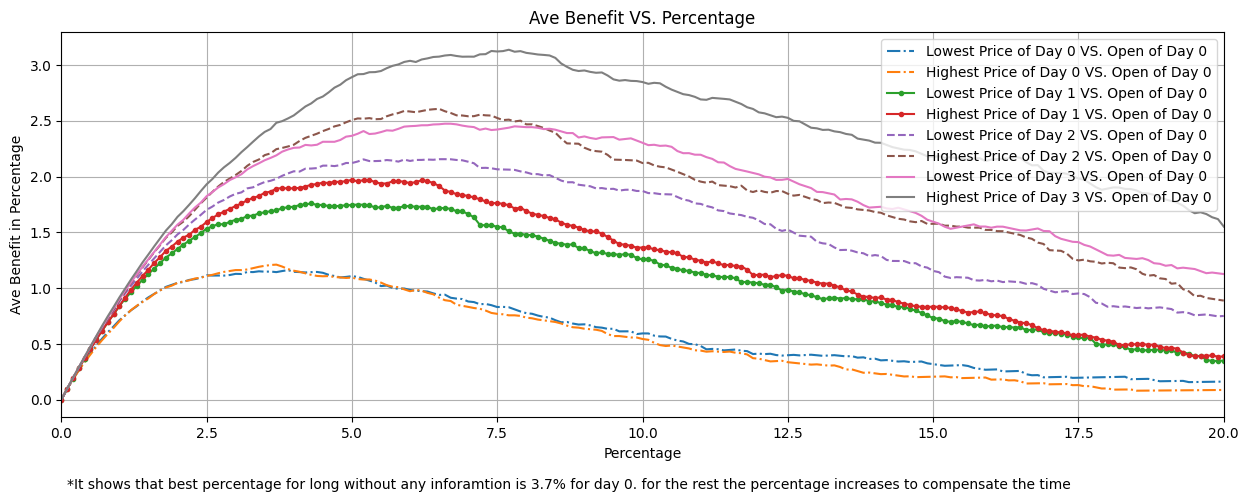

In [25]:
ax = best_profit.plot(figsize=(15,5),grid=True,style=['-.','-.','.-','.-','--','--'],
                      title='Ave Benefit VS. Percentage')
ax.text(x=.10,y=-0.8,
        s='*It shows that best percentage for long without any inforamtion is 3.7% for day 0. for the rest the percentage increases to compensate the time')
ax.set_xlim(left=0,right=20)
ax.set_xlabel(xlabel='Percentage')
ax.set_ylabel(ylabel='Ave Benefit in Percentage')

### The rest is same as top, the close price is used instead of open price

In [26]:
close_price = data[['Close','High',"Low"]].copy()
close_price

,Close,High,Low
Date,,,
2017-11-09,320.884003,329.451996,307.056000
2017-11-10,299.252991,324.717987,294.541992
2017-11-11,314.681000,319.453003,298.191986
2017-11-12,307.907990,319.153015,298.513000
2017-11-13,316.716003,328.415009,307.024994
...,...,...,...
2022-03-21,2897.976563,2954.556641,2838.250488
2022-03-22,2973.131104,3040.382813,2892.544434
2022-03-23,3031.067139,3036.752197,2933.306641


In [27]:
close_price['High/Close'] = (close_price['High']/close_price['Close']-1)*100
close_price['Low/Close'] = (close_price['Low']/close_price['Close']-1)*100

<Axes: xlabel='Date'>

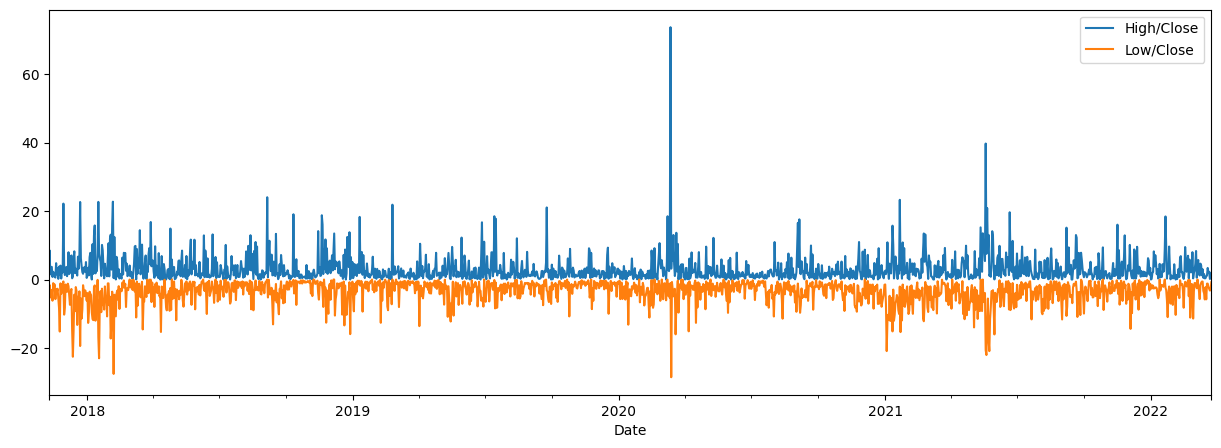

In [28]:
close_price[['High/Close','Low/Close']].plot(figsize=(15,5))

In [29]:
close_price

,Close,High,Low,High/Close,Low/Close
Date,,,,,
2017-11-09,320.884003,329.451996,307.056000,2.670122,-4.309346
2017-11-10,299.252991,324.717987,294.541992,8.509521,-1.574253
2017-11-11,314.681000,319.453003,298.191986,1.516457,-5.239914
2017-11-12,307.907990,319.153015,298.513000,3.652073,-3.051233
2017-11-13,316.716003,328.415009,307.024994,3.693847,-3.059842
...,...,...,...,...,...
2022-03-21,2897.976563,2954.556641,2838.250488,1.952399,-2.060958
2022-03-22,2973.131104,3040.382813,2892.544434,2.261983,-2.710498
2022-03-23,3031.067139,3036.752197,2933.306641,0.187560,-3.225283


In [30]:
h_c = np.zeros(shp)
l_c = np.zeros(shp)
for changes_percentage in range(len(price_changes_percentage)):
    h_c[changes_percentage] = np.sum(close_price['High/Close']>=price_changes_percentage[changes_percentage])/samples_nu
    l_c[changes_percentage] = np.sum(close_price['Low/Close']<=price_changes_percentage[changes_percentage]*-1)/samples_nu

In [31]:
close_ratio = pd.DataFrame(data=[h_c,l_c]).transpose()
close_ratio.index = price_changes_percentage
close_ratio.columns = ['High/Close','Low/Close']


In [32]:
close_ratio

,High/Close,Low/Close
0.0,1.000000,1.000000
0.1,0.958698,0.973717
0.2,0.926158,0.961202
0.3,0.900501,0.946183
0.4,0.869837,0.928661
...,...,...
19.6,0.007509,0.005006
19.7,0.006884,0.005006
19.8,0.006884,0.005006
19.9,0.006884,0.005006


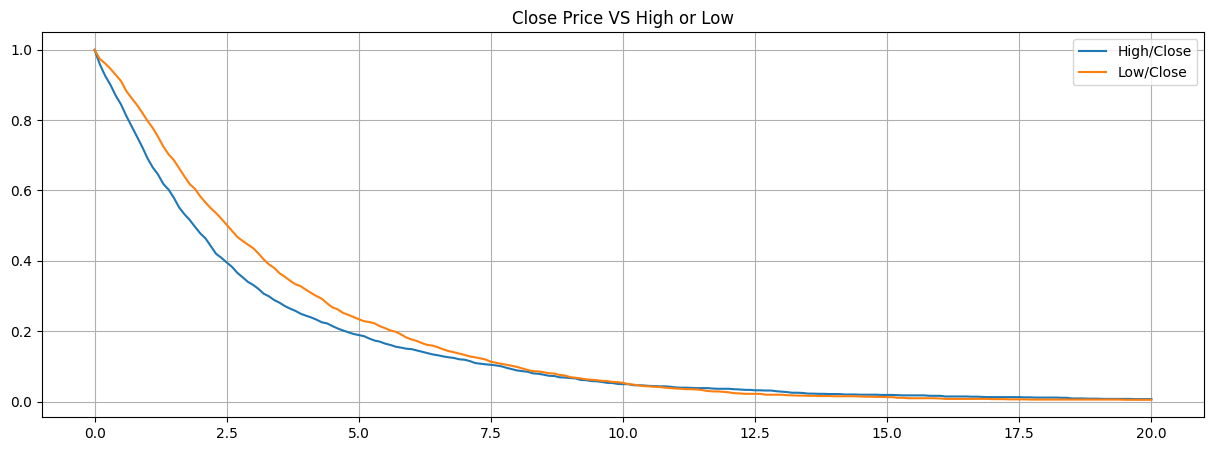

In [33]:
ax = close_ratio.plot(figsize=(15,5),title='Close Price VS High or Low',grid=True)

In [34]:
l_c_exception = np.zeros(shp)
h_c_exception = np.zeros(shp)
for changes_percentage in range(len(price_changes_percentage)):
    l_c_exception[changes_percentage] = price_changes_percentage[changes_percentage] * l_c[changes_percentage]
    h_c_exception[changes_percentage] = price_changes_percentage[changes_percentage] * h_c[changes_percentage]


In [35]:
close_expection = pd.DataFrame(data=[l_c_exception,h_c_exception,worst_lose_0,best_profit_0]).transpose()
close_expection.index = price_changes_percentage
close_expection.columns = ['Low/Close Exception','High/Close Expection',
                           'Low/Open Exception','High/Open Exception']

Text(0.5, 0, 'Percentage Change')

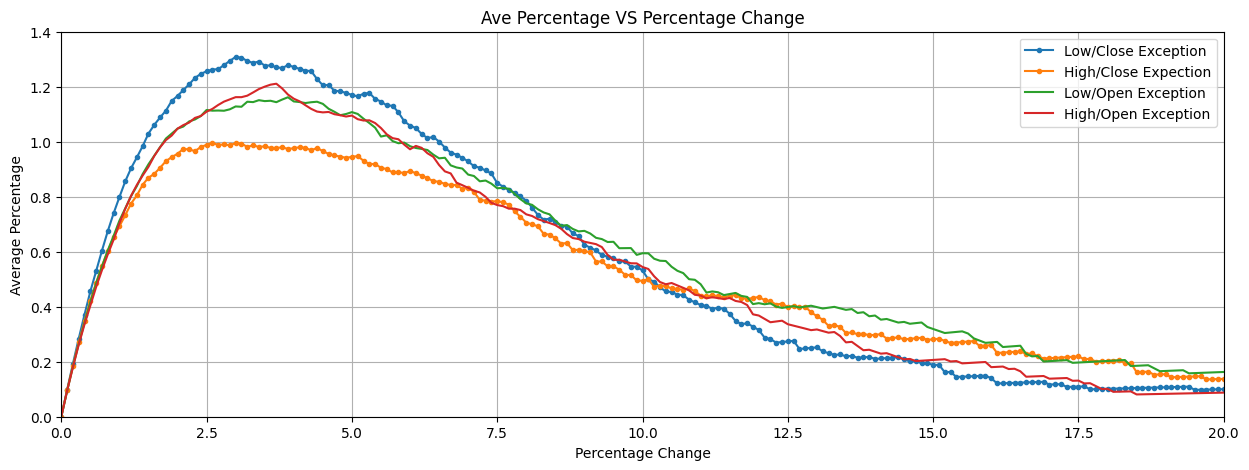

In [36]:
ax = close_expection.plot(figsize=(15,5),grid=True,style=['.-','.-'],title='Ave Percentage VS Percentage Change')
ax.set_xlim(left=0,right=20)
ax.set_ylim(top=1.4,bottom=00)
ax.set_ylabel('Average Percentage')
ax.set_xlabel('Percentage Change')


Text(0.5, 0, 'Percentage Change')

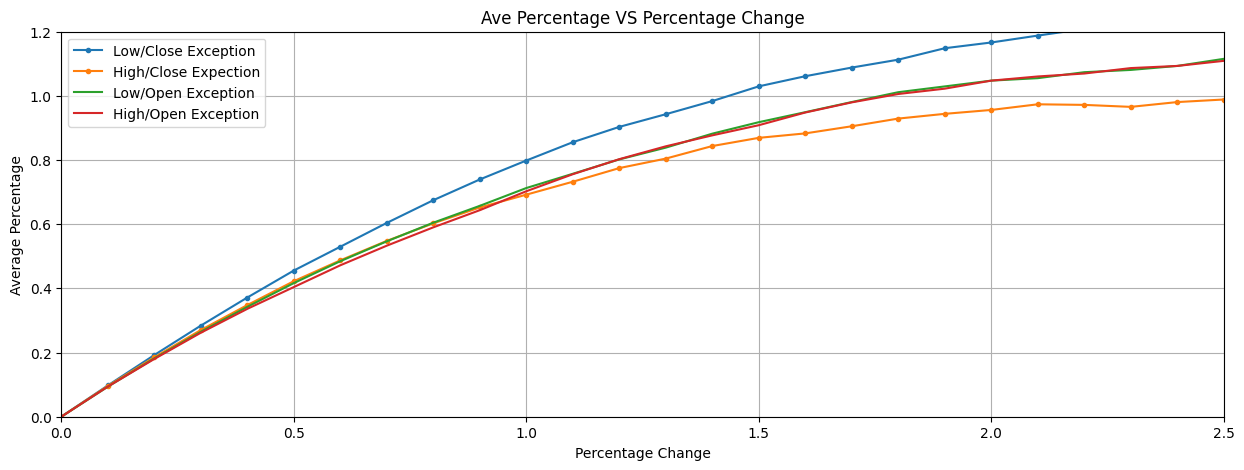

In [37]:
ax = close_expection.plot(figsize=(15,5),grid=True,style=['.-','.-'],title='Ave Percentage VS Percentage Change')
ax.set_xlim(left=0,right=2.5)
ax.set_ylim(bottom=0,top=1.2)
ax.set_ylabel('Average Percentage')
ax.set_xlabel('Percentage Change')

#### Now we reached the final step
.

.

.
.

.
.

.
.

.
#### here we can calculate the best ratio between sell price and stop lose
#### As I did not have complete data this part is unfinished 

In [38]:
test_duration = 365
final_percentage = np.zeros((shp,shp))
for row in range(len(final_percentage[0])):
    for line in range(len(final_percentage[1])):
        # final_percentage[row][line] = (                      )**test_duration
        pass




In [39]:
final_df = pd.DataFrame(data=final_percentage)
final_df.index = price_changes_percentage
# final_df.columns = ['Gain']

Text(0.5, 0, 'Date')

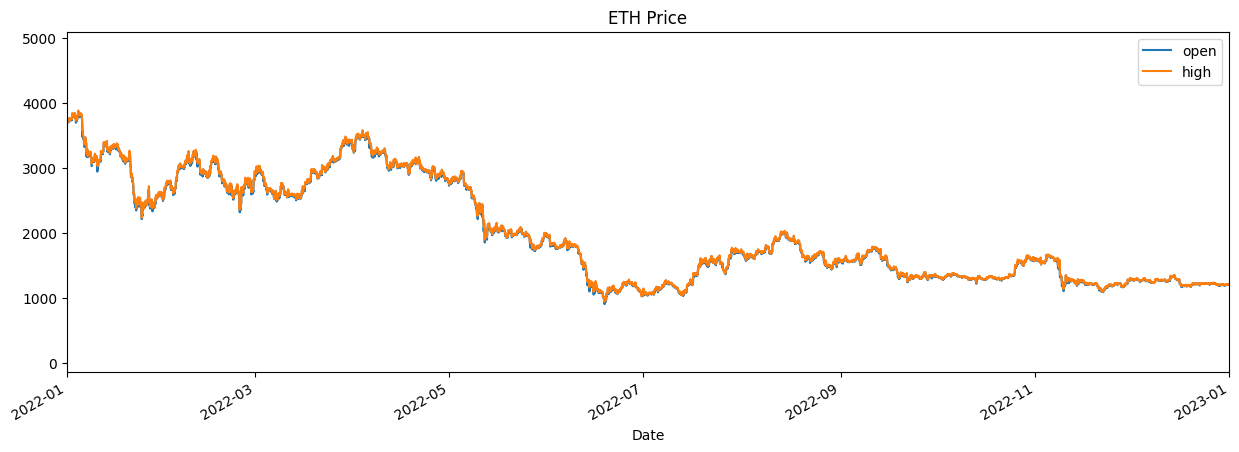

In [78]:

# ax.set_ylim(bottom=0,top=1230)
